# Problem Statement
The objective of this project is to design or to develop a robust or accurate credit card fraud detection system that can effectively identify and prevent fraudulent transaction in real time . This is crucial from the bank’s as well as customer’s perspective..

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithim

## Steps:-
The steps are broadly divided into below steps.# solution Data Collection: Collect a labeled dataset that includes historical credit card transactions. The dataset should contain relevant features such as transaction amount, merchant information, transaction time, and other related variables.

Data Preprocessing: Preprocess the dataset by performing tasks such as data cleaning, handling missing values, feature selection and normalization. Ensure that the dataset is balanced, meaning it has a similar number of fraudulent and valid transactions to prevent bias in the model.

Splitting the Dataset: Split the preprocessed dataset into training and testing sets.

Model Training: Train the model on the training data, using a suitable metric

Model Evaluation: Evaluate the trained model using the testing data. Calculate metrics such as accuracy, precision, recall, and F2-score to assess the model's performance in correctly identifying fraudulent transactions and minimizing false positives and false negatives.

Fine Tuning: Adjust the Decision Tree model's parameters and hyperparameters, such as maximum depth, minimum samples per leaf and splitting criteria, to optimize its performance thereby preventing overfitting and improve the model's generalization  activities

In [205]:
import numpy as np  #Numpy or numerical python is used for numerical computing it supports n dimensional aaray
import pandas as pd #Pandas is a Python library for data manipulation and analysis.
import matplotlib.pyplot as plt #matplotlib is a powerful python library used for creating static interactive visualizations.
import seaborn as sns #provides a high level interface for drawing attractive and informative statistical graphics.


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

In [206]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [208]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [209]:
df.duplicated().any()

True

In [210]:
#since there were duplicates rows present so as a solution ---drop duplicates
df.drop_duplicates(inplace=True)

In [211]:
classes=df["Class"].value_counts() # highly imbalanced data

In [212]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [213]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

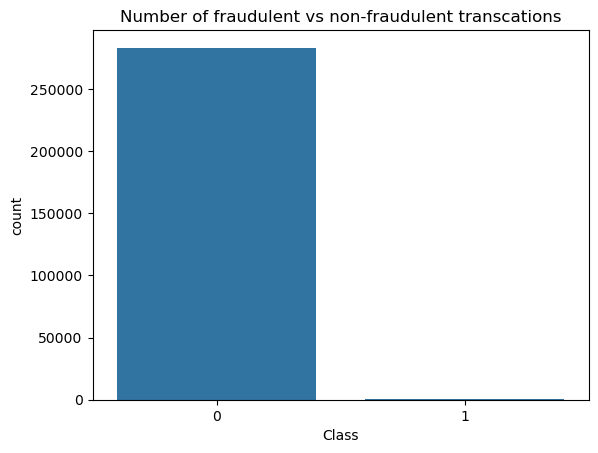

In [214]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

Outliers treatment
We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

In [216]:
df[df["Class"]==0] #gives all the values where class is zero 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [217]:
df[df["Class"]==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [218]:
valid=df[df["Class"]==0] # Creating non fraudulent dataframe
fraud=df[df["Class"]==1] # Creating fraudulent dataframe

In [219]:
valid.shape

(283253, 31)

In [220]:
fraud.shape

(473, 31)

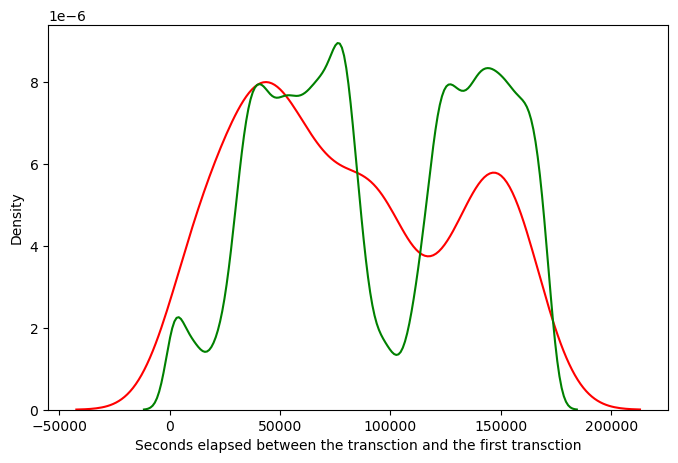

In [221]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False,color="red")
ax = sns.distplot(valid['Time'],label='non fraudulent',hist=False,color="green")
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [222]:
valid_sample=valid.sample(n=473)
valid_sample.shape

(473, 31)

In [223]:
new_df=pd.concat([valid_sample,fraud],ignore_index=True)
new_df.shape

(946, 31)

In [224]:
new_df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,156188.0,1.928924,-0.177129,-1.172743,0.235580,0.528127,0.354628,-0.043148,0.095955,0.474037,...,-0.199867,-0.307083,0.424194,-1.022701,-0.512328,0.294818,-0.014648,-0.070934,0.89,0
1,62884.0,1.404475,-0.926625,0.213002,-1.389125,-1.312183,-1.029015,-0.574113,-0.248347,-2.470343,...,-0.473388,-1.141982,0.184689,0.474369,0.175145,-0.566957,0.001676,0.019130,53.40,0


#Observe the distribution of classes with amount

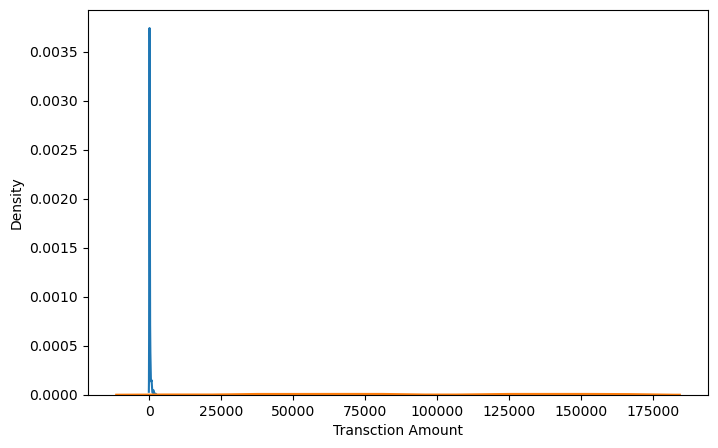

In [226]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(valid['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

In [227]:
new_df.drop("Time",axis=1,inplace=True)

In [228]:
new_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [229]:
features=new_df.iloc[:,:-1]
target=new_df.iloc[:,-1]

In [230]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=42)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(662, 29) (662,) (284, 29) (284,)


In [231]:
# Standardization method
from sklearn.preprocessing import StandardScaler
# Instantiate the Scaler
scaler = StandardScaler()
# Fit the data into scaler and transform
xtrain['Amount'] = scaler.fit_transform(xtrain[['Amount']])
xtrain.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212,2.009582,-0.192946,-0.328706,0.300126,-0.569342,-0.740812,-0.390352,-0.142091,1.212719,-0.248722,...,-0.190214,-0.119057,-0.161275,0.325841,-0.147531,-0.320094,-0.919674,0.064529,-0.026675,-0.469784
79,-0.768915,0.024629,0.262943,-0.821516,-1.570347,1.614035,2.411455,-0.671586,2.011670,-0.908234,...,-0.523997,-0.003594,1.073913,-0.168540,-0.752321,-0.940117,-0.101695,-0.034954,-0.012258,1.896312
148,2.174150,-0.884848,-1.698980,-1.216657,-0.089004,-0.290813,-0.498924,-0.132152,-0.698941,1.029694,...,0.081402,0.468003,1.225508,-0.093835,0.149083,0.246190,0.058495,-0.052198,-0.069004,-0.261862
464,0.088895,0.359736,0.380609,0.867279,1.039821,0.614399,0.937693,-0.438395,-0.060995,0.591725,...,0.298519,-0.016473,0.582053,-0.273536,0.280463,-0.565563,-0.013377,-0.154143,-0.283358,-0.193297
447,-0.315866,0.669090,1.132749,-0.784554,0.854991,1.164412,0.432859,-0.054819,-0.354421,0.107550,...,0.225551,-0.107726,-0.125640,-0.140498,-1.618238,-0.800399,0.843370,-0.302946,-0.098845,-0.381968


In [232]:
# Transform the test set
xtest['Amount'] = scaler.transform(xtest[['Amount']])
xtest.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
327,-1.023054,1.592827,1.388524,4.332945,-0.198530,1.845301,-1.013855,1.255194,-1.690349,0.907973,...,0.050811,0.185468,0.380310,0.069434,0.028145,-0.623749,0.288670,-0.104719,-0.010844,-0.448873
30,2.147540,-0.851628,-1.199278,-0.113530,-0.780837,-0.905223,-0.449070,-0.203923,0.044552,0.885543,...,-0.746387,-0.250470,-0.025089,0.096611,-0.082918,0.027222,0.739902,-0.051747,-0.070839,-0.419997
820,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,0.042228,...,-0.153570,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,-0.459258
404,2.267963,-1.372286,-0.656692,-1.438575,-1.523580,-0.972211,-1.126407,-0.271196,-1.142897,1.548853,...,-0.405059,-0.149198,0.102418,0.244831,0.035559,-0.246467,-0.182455,0.021845,-0.044210,-0.362622
76,0.258846,0.085702,0.123125,-1.438517,0.665894,-0.275032,0.825827,-0.468604,-1.005475,0.320056,...,-0.365033,-0.135117,0.538009,-0.125446,0.567483,-0.744363,0.613259,0.037045,0.013773,-0.403401


#Checking the Skewness

In [234]:
# Listing the columns
cols = xtrain.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

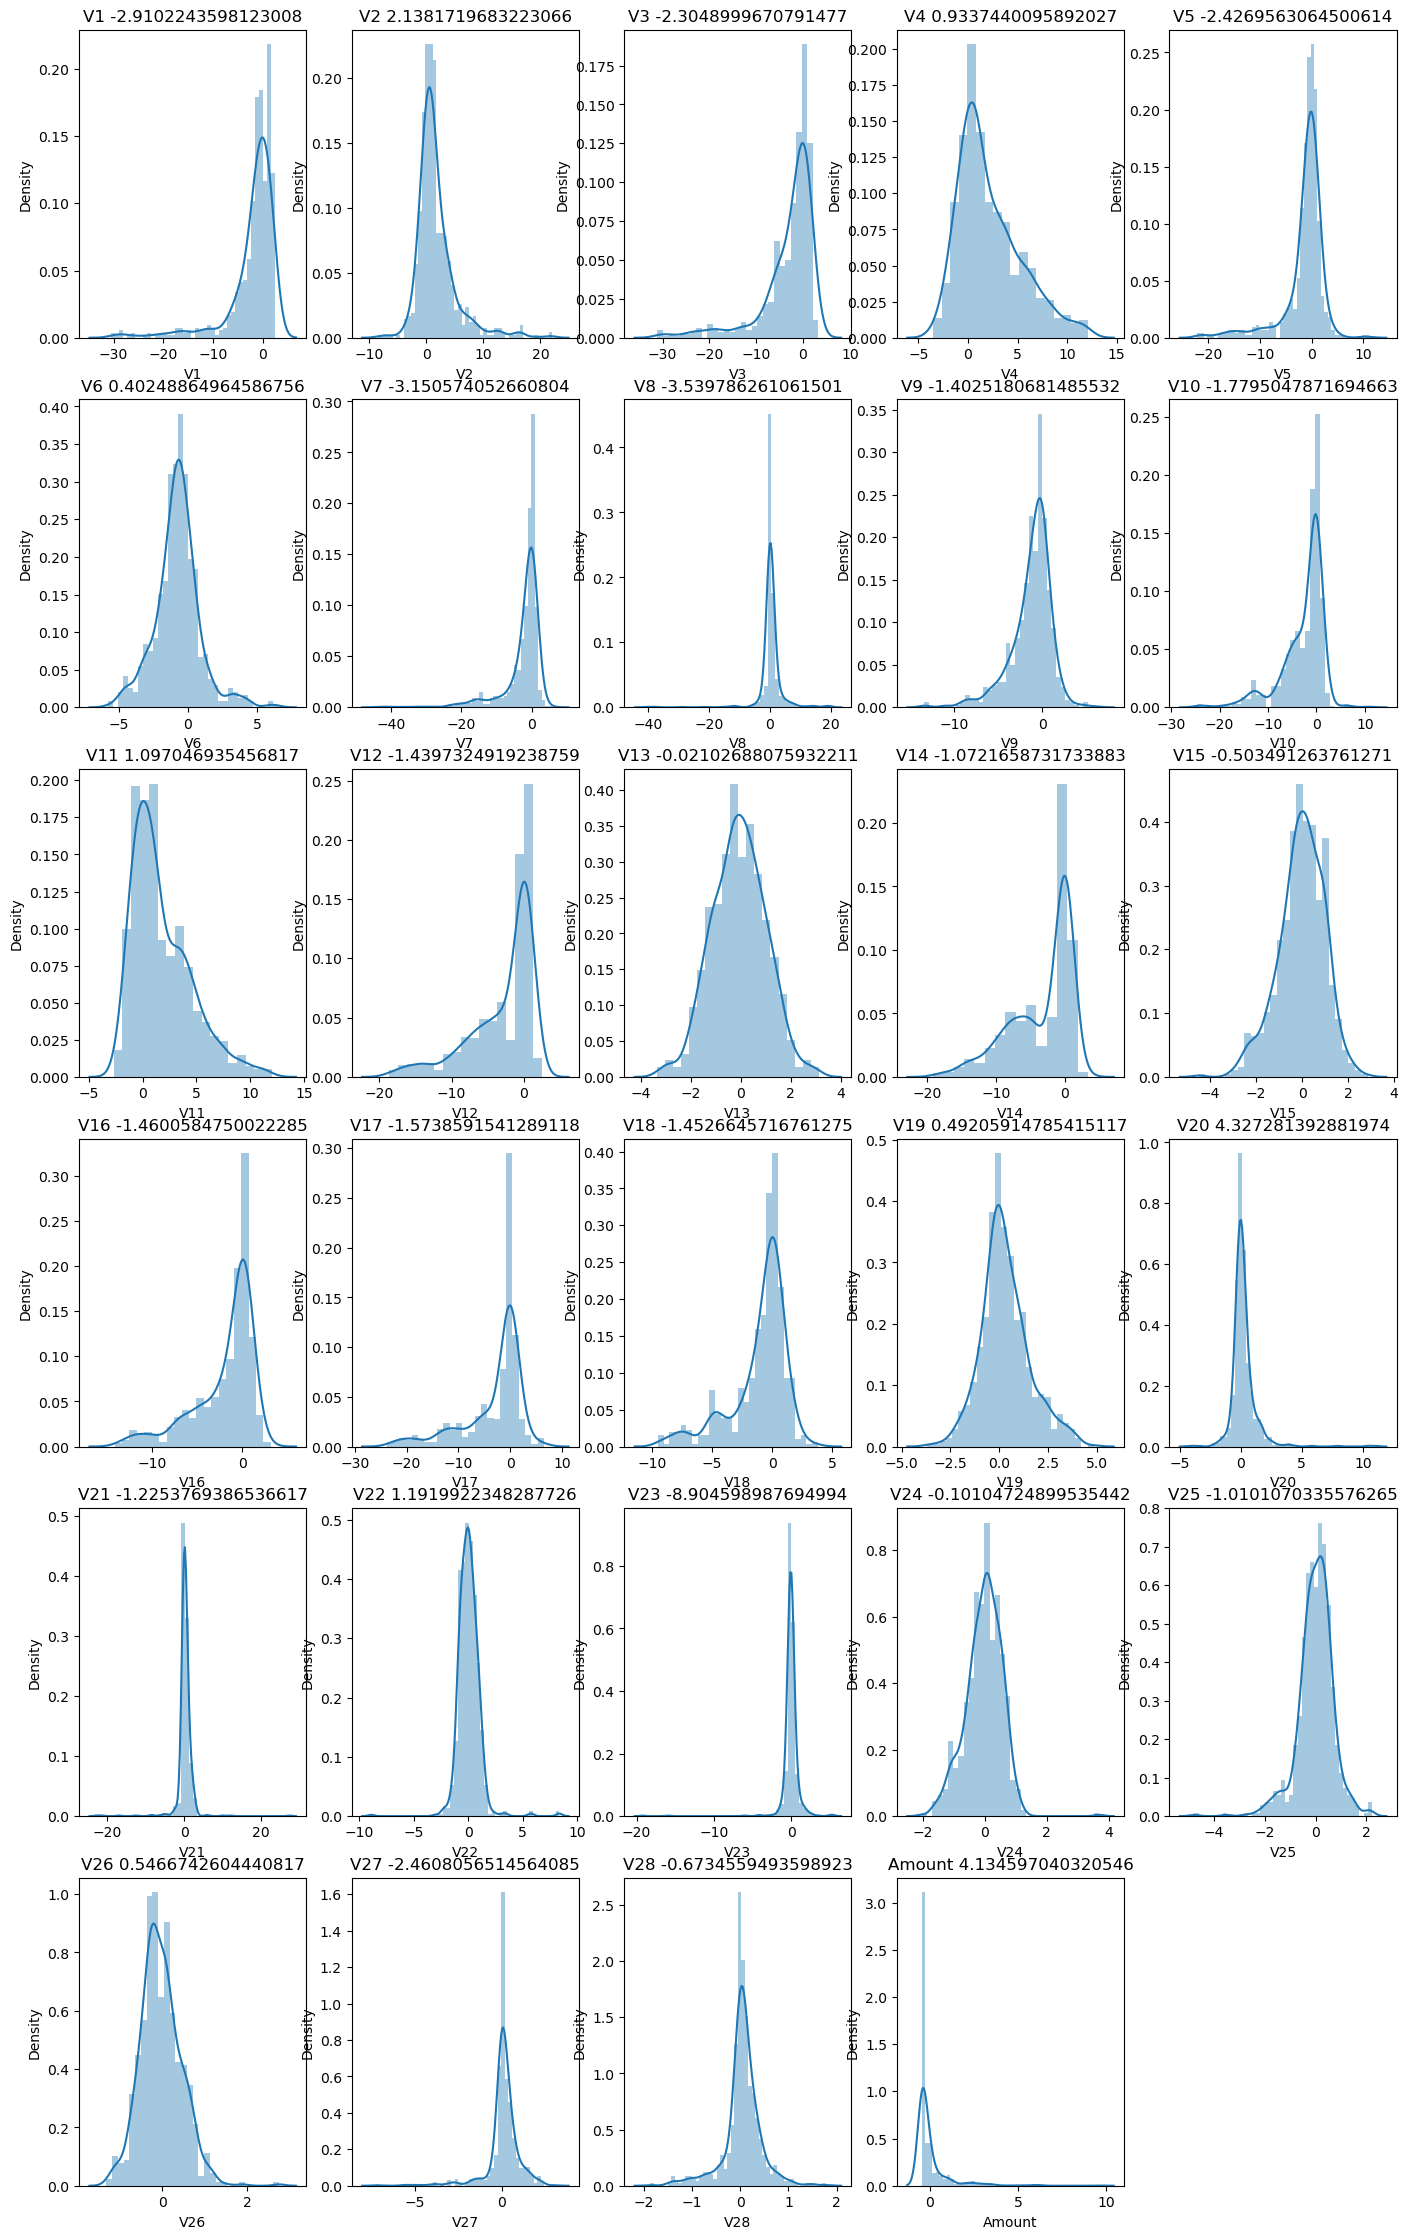

In [235]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(xtrain[col])
    plt.title(col+' '+str(xtrain[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

In [237]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
xtrain[cols] = pt.fit_transform(xtrain)
# Transform the test set
xtest[cols] = pt.transform(xtest)

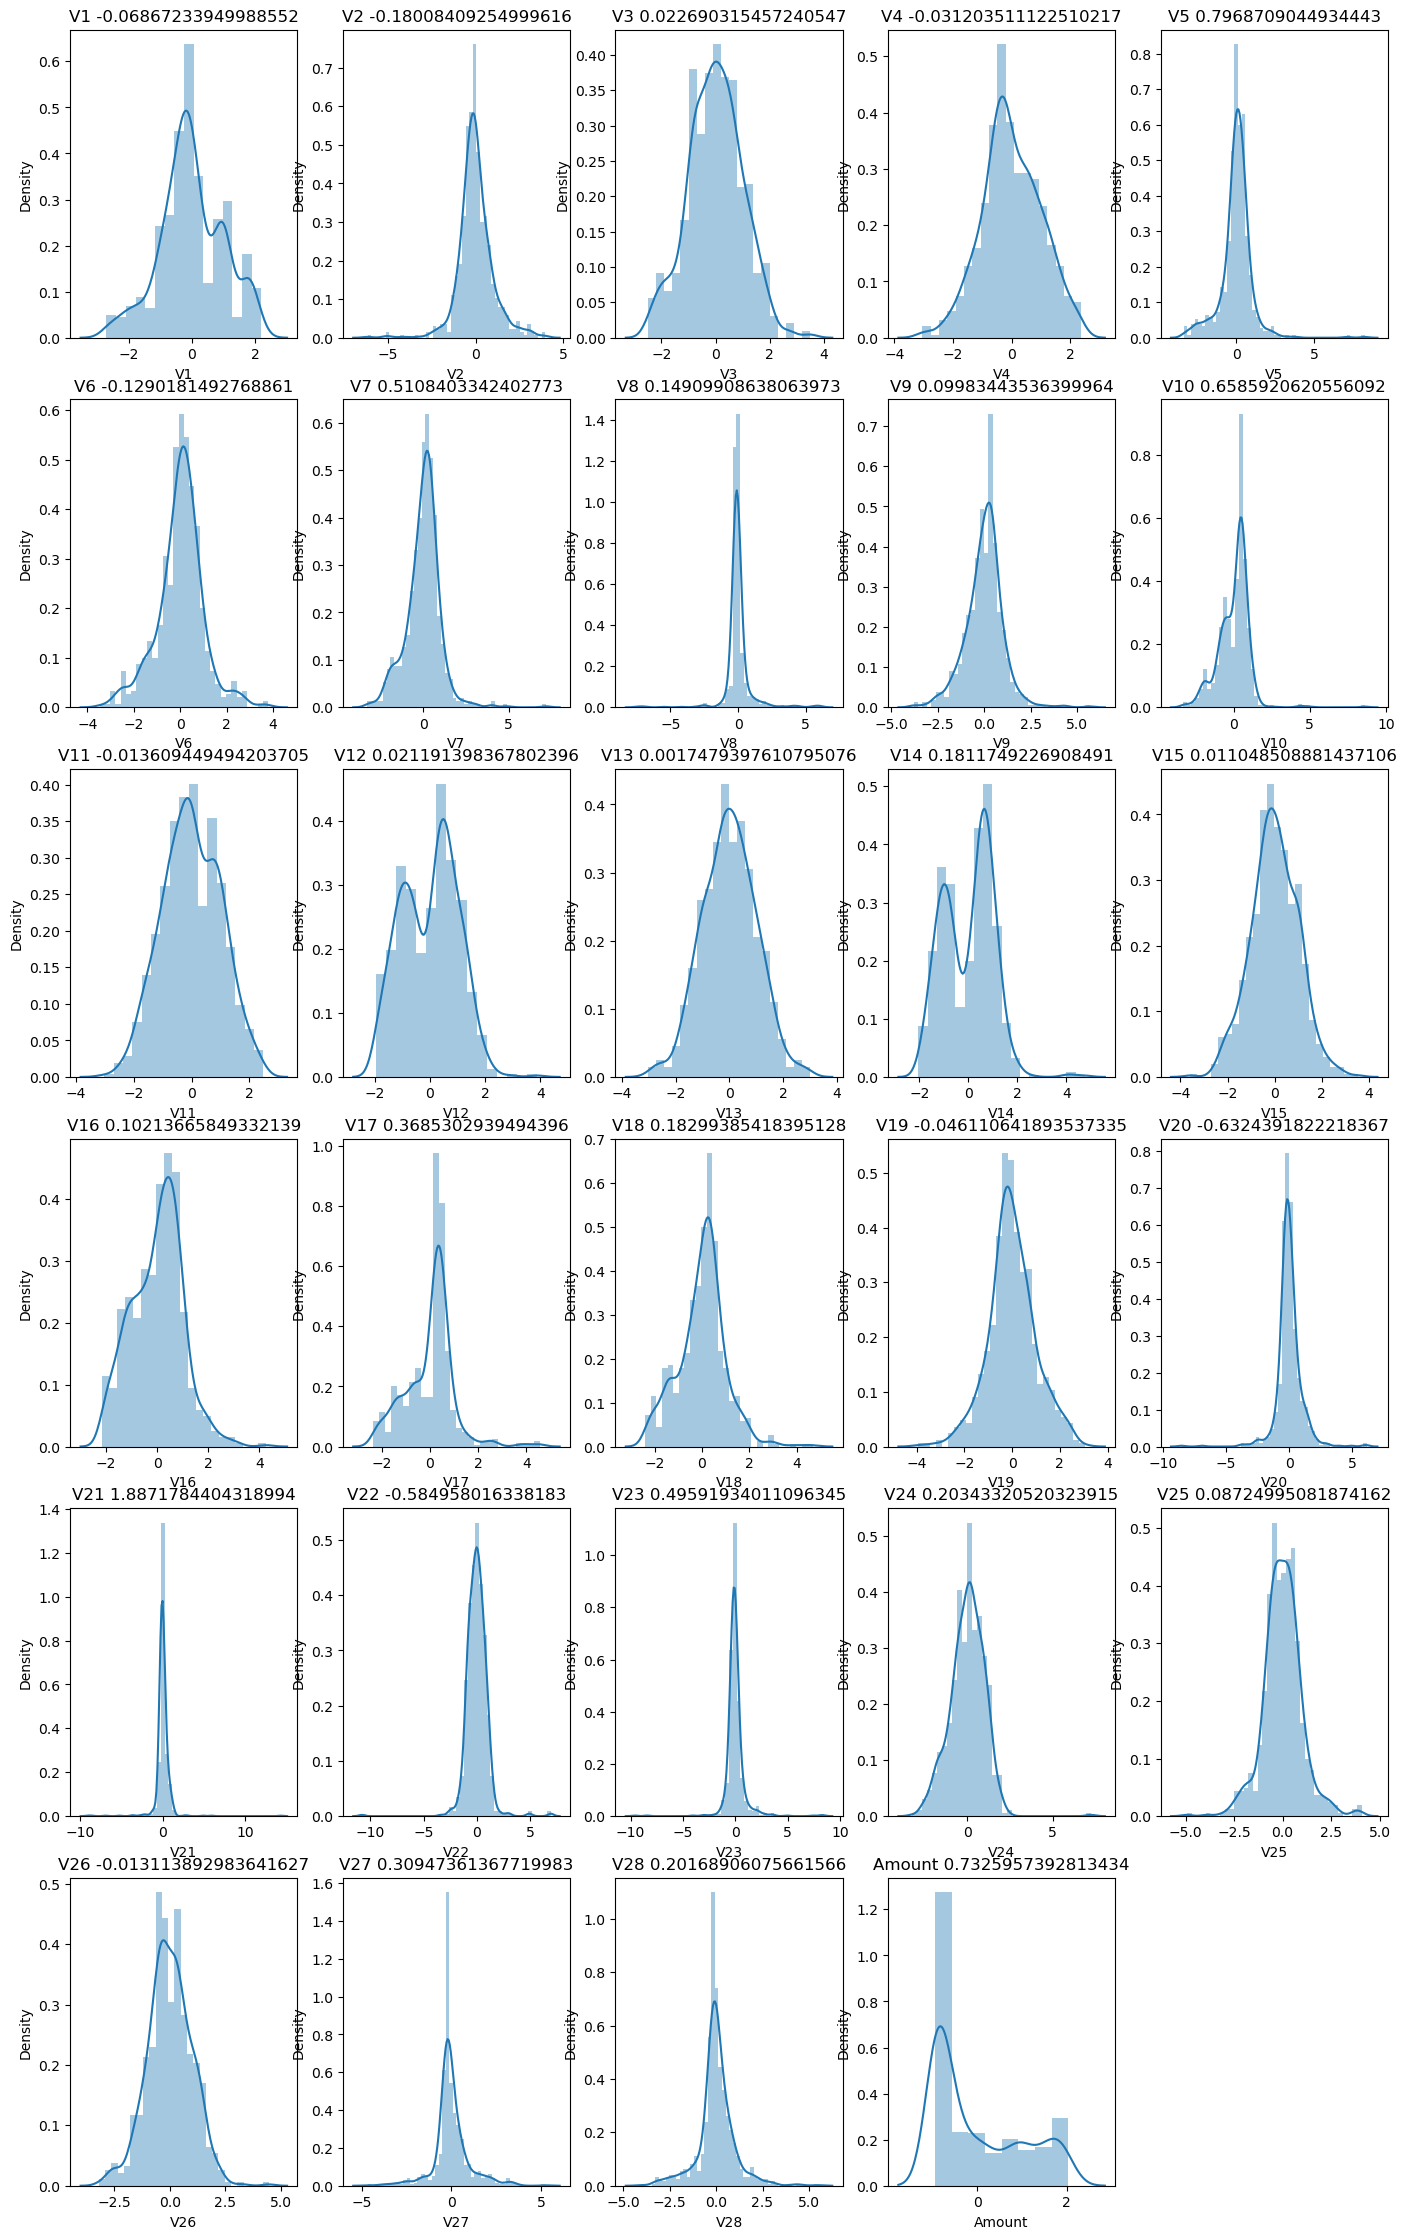

In [238]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(xtrain[col])
    plt.title(col+' '+str(xtrain[col].skew()))

In [239]:
#Logistic Regression
lr= LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [240]:
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"confusion_matrix : \n{cm} \n classification_report : \n{cr}")

confusion_matrix : 
[[137   3]
 [ 11 133]] 
 classification_report : 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       140
           1       0.98      0.92      0.95       144

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284



In [241]:
lr.score(xtrain,ytrain) #training is more than test so there is overfitting

0.9501510574018127

In [242]:
lr.score(xtest,ytest)

0.9507042253521126

In [243]:
#Decision Tree Classifier 
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [244]:
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"confusion_matrix : \n{cm} \n classification_report : \n{cr}")

confusion_matrix : 
[[132   8]
 [ 12 132]] 
 classification_report : 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.94      0.92      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



In [245]:
dt.feature_importances_

array([0.01775369, 0.01007086, 0.        , 0.07029284, 0.        ,
       0.01473703, 0.01772973, 0.00402834, 0.        , 0.        ,
       0.00555156, 0.04025426, 0.01213351, 0.71379004, 0.00557771,
       0.00187989, 0.0126928 , 0.        , 0.00453189, 0.0167651 ,
       0.00906378, 0.        , 0.01227789, 0.00992516, 0.        ,
       0.00541088, 0.        , 0.00453189, 0.01100117])

In [246]:
dic={"Input feature" : features.columns,"Information Gain" : dt.feature_importances_}
df1=pd.DataFrame(dic)
df1

,Input feature,Information Gain
0,V1,0.017754
1,V2,0.010071
2,V3,0.000000
3,V4,0.070293
4,V5,0.000000
5,V6,0.014737
6,V7,0.017730
7,V8,0.004028
8,V9,0.000000
9,V10,0.000000


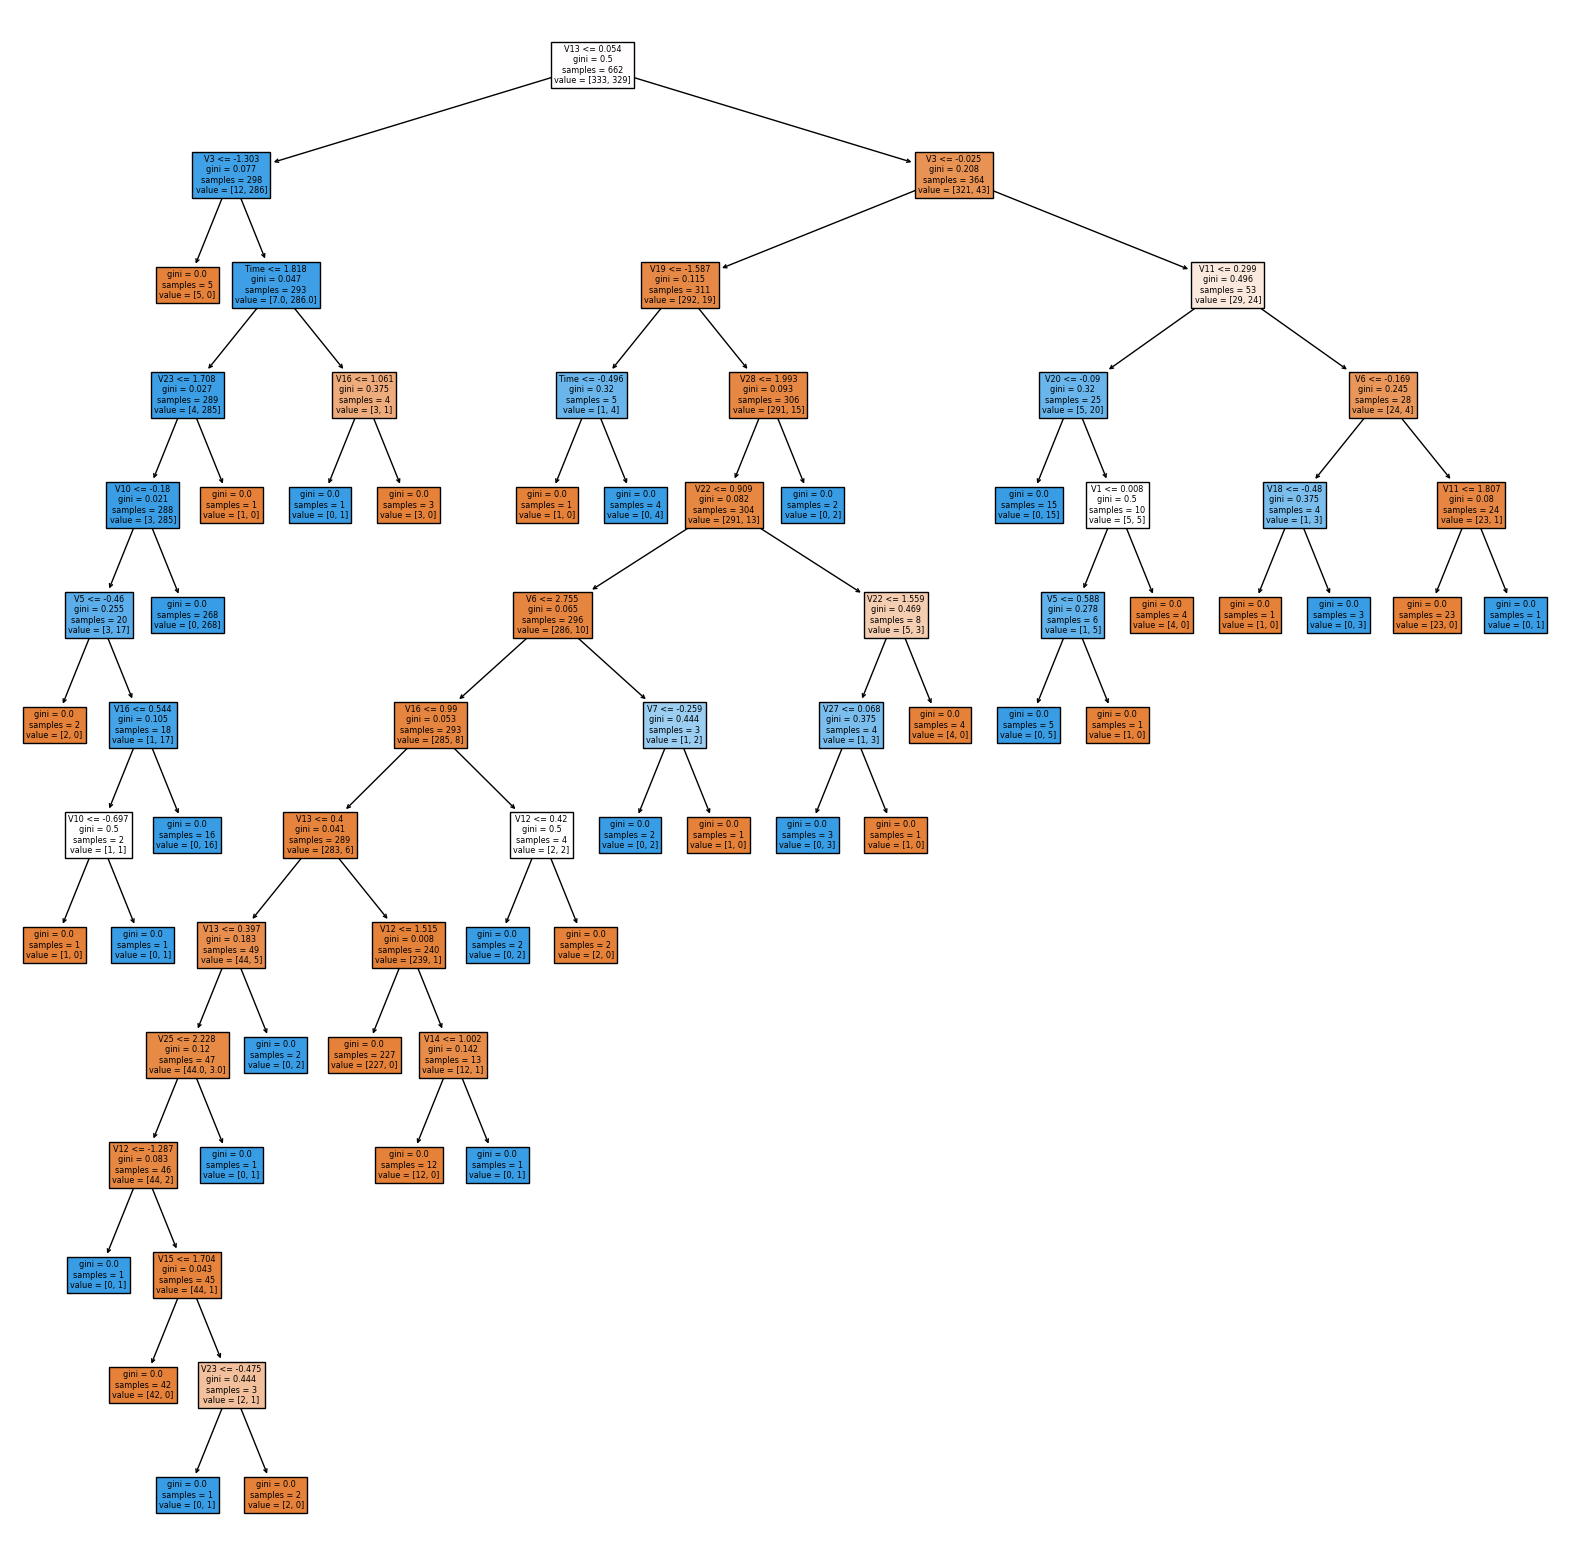

In [247]:
from sklearn import tree
#features=df.columns
fig=plt.figure(figsize=(20,20))
tree.plot_tree(dt,feature_names=df.columns.tolist(),filled=True)
plt.show()

In [248]:
dt.score(xtrain,ytrain)

1.0

In [249]:
dt.score(xtest,ytest)

0.9295774647887324

In [250]:
#tr>te ------ overfitting , so we have to apply pruning techniques

In [251]:
parameters = {
    "criterion":['gini','entropy'],
    "max_depth" : list(range(2,6)),
    "min_samples_split" : list(range(3,8))
}

In [252]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(dt, parameters , verbose=2)
clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...criterion=gini, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6, 7]},
             verbose=2)

In [253]:
clf.best_score_

0.9245500113921166

In [254]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=3,
                       random_state=42)

In [255]:
dt1=DecisionTreeClassifier(max_depth=5, min_samples_split=4)
dt1.fit(xtrain,ytrain)
ypred = dt1.predict(xtest)
print("Trining Score",dt1.score(xtrain,ytrain))
print("Testing score",dt1.score(xtest,ytest))

Trining Score 0.974320241691843
Testing score 0.9330985915492958


In [256]:
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"confusion_matrix : \n{cm} \n classification_report : \n{cr}")

confusion_matrix : 
[[132   8]
 [ 11 133]] 
 classification_report : 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.94      0.92      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



In [257]:
dic={"Input feature" : features.columns,"Information Gain" : dt1.feature_importances_}
df1=pd.DataFrame(dic)
df1


,Input feature,Information Gain
0,V1,0.014200
1,V2,0.016050
2,V3,0.000000
3,V4,0.077258
4,V5,0.000000
5,V6,0.000000
6,V7,0.011425
7,V8,0.000000
8,V9,0.000000
9,V10,0.000000


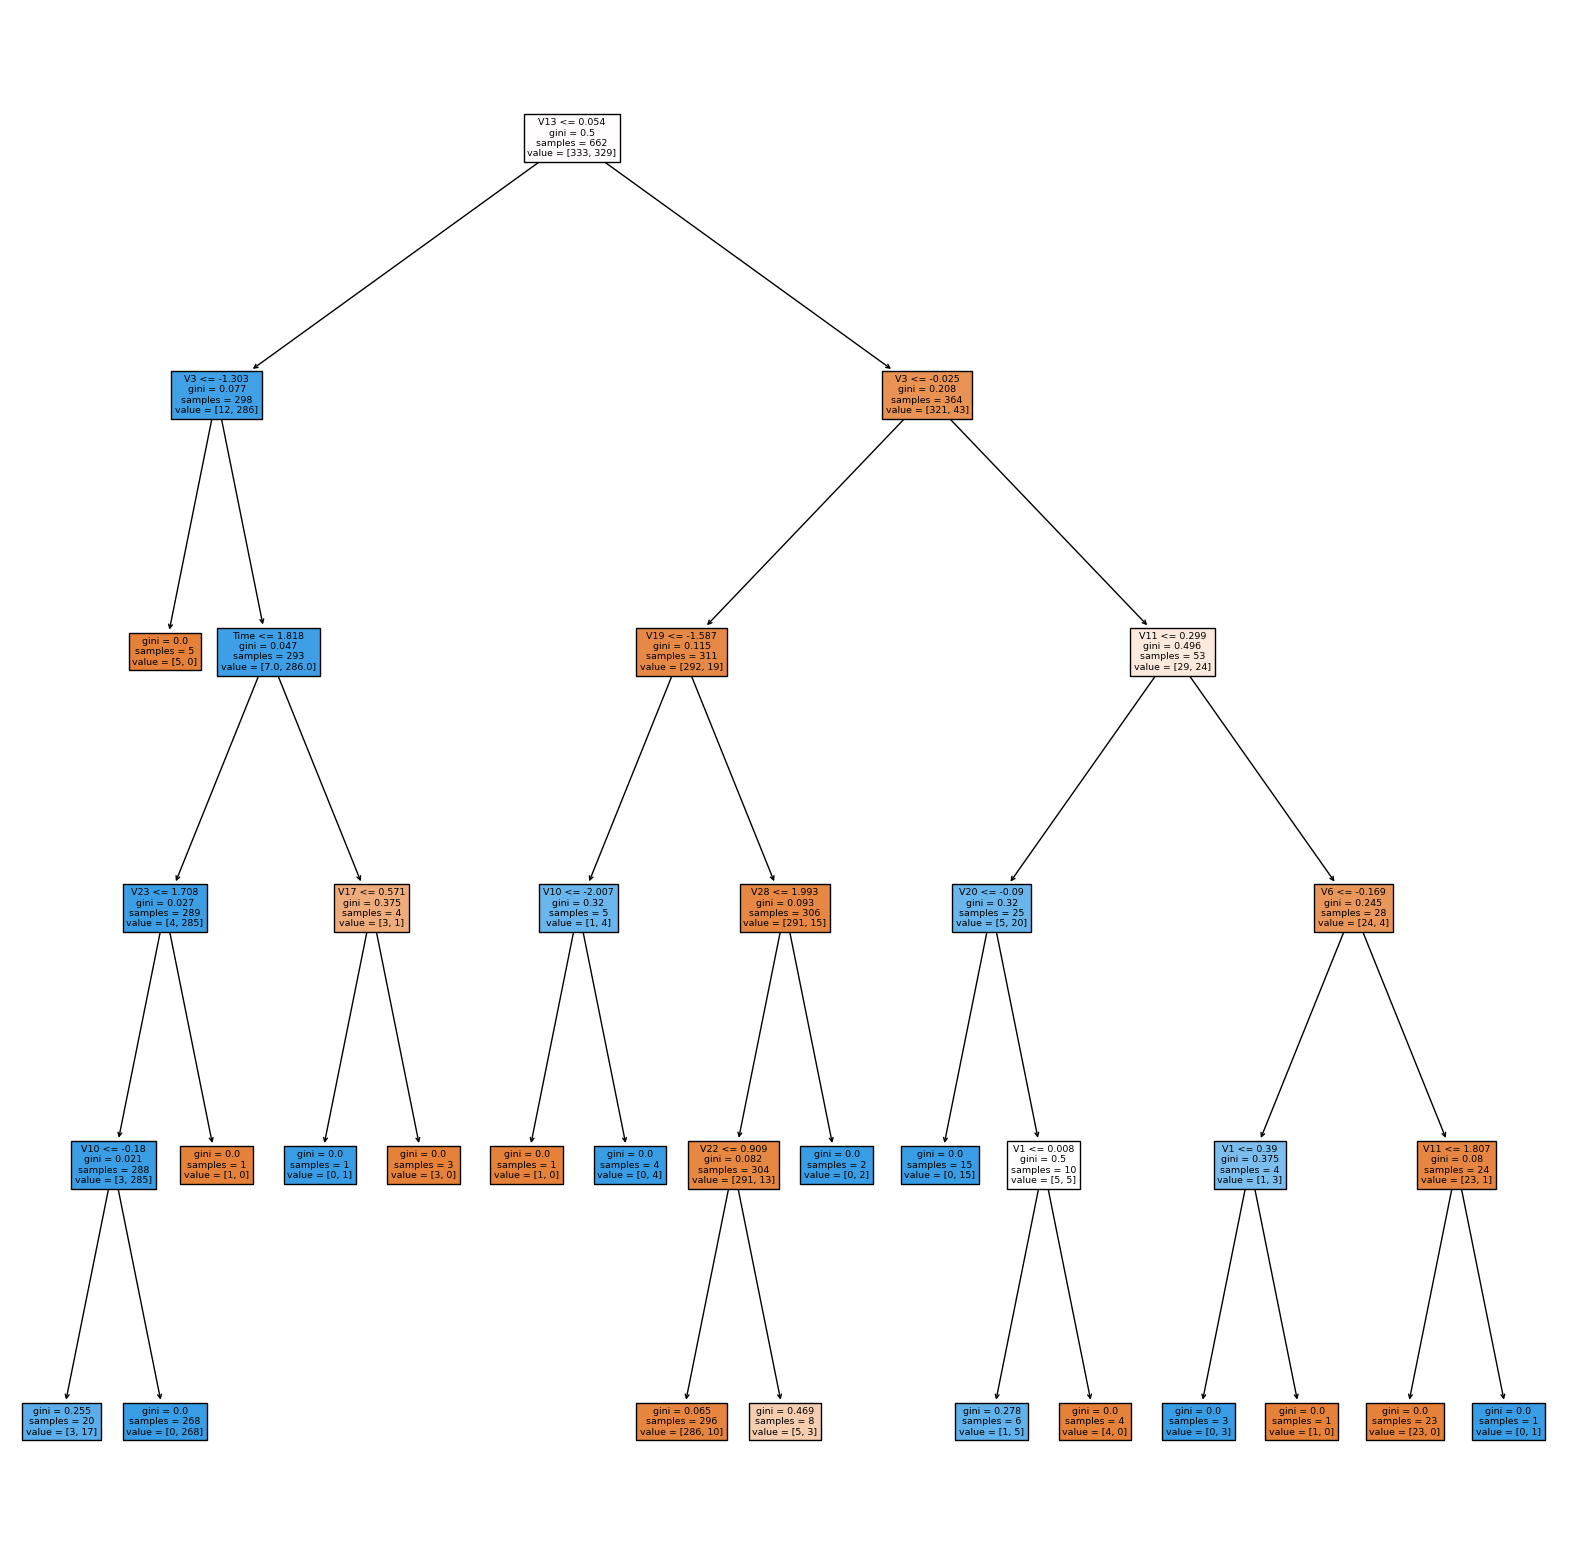

In [258]:
from sklearn import tree
#features=df.columns
fig=plt.figure(figsize=(20,20))
tree.plot_tree(dt1,feature_names=df.columns.tolist(),filled=True)
plt.show()

In [259]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
print(clf.score(xtrain,ytrain))
print(clf.score(xtest,ytest))

1.0
0.9471830985915493


In [260]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"confusion_matrix : \n{cm} \n classification_report : \n{cr}")

confusion_matrix : 
[[135   5]
 [ 10 134]] 
 classification_report : 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       140
           1       0.96      0.93      0.95       144

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284

